In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
hv = pd.read_csv('/Users/jennyskytta/Desktop/hv.csv', sep="\t")
hv.sample(5) # look at sample of our data 

,party,yea1,yea2,yea3,yea4,yea5,yea6,yea7,yea8,yea9,yea10,yea11,yea12,yea13,yea14,yea15,yea16
91,democrat,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,1
179,democrat,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
385,democrat,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0
194,democrat,0,0,1,0,0,1,1,0,1,1,1,0,0,0,1,1
59,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0


They tell how someone voted and we tell whether they were Rep or Dem - we must calculate probabiity that someone is a dem or republican.  We look at cases where votes are all the same and then use the probabilities of which ones differ by party to calculate.   

We figure out the conditional probability which is 2/3 
and the unconditional probabiilty is 50/50 
and probability of vote given X

Party      Votes
    D    Y
    R    Y
    D    Y
    R    N


In [15]:
pD = np.mean(hv.party == "democrat")
pD 

0.6137931034482759

In [17]:
pV1y = np.mean(hv.yea1 == 1)
pV1y

0.4298850574712644

In [18]:
pV1y_D = np.mean(hv.yea1[hv.party == "democrat"] == 1)
pV1y_D

0.5842696629213483

In [19]:
pD_V1y = pV1y_D * pD / pV1y
pD_V1y   # if the person voted yes, its 84 % likely that they were Democrat 

0.8342245989304813

In [20]:
pR = np.mean(hv.party == "republican")
pR  # posterior probability that they are republican is 38%

0.38620689655172413

In [21]:
pV1n = np.mean(hv.yea1 == 0)
pV1n

0.5701149425287356

In [22]:
pV1n_R = np.mean(hv.yea1[hv.party == "republican"] == 0)
pV1n_R

0.8154761904761905

In [23]:
pV1n_R * pR / pV1n

0.5524193548387096

example: Compute probability of spam given two words: 
2 raised to power of 10,000 if we assumed 10,000 words 

- Prob(V1 = Y, v2 = Y| dem) 

probability that they voted yes the 1st time, yes the second time, given that they are a democrat 

- 2 ^ K(K=votes)
- 2 ^ 10,000 -> 20,000k probs

    

## Code example

P(D|V1, V2) = P(V1, V2 | D) * P(D)
-              P(V1, V2

P(V1 | D) * P(V2 | D) * P(D)

In [25]:
from sklearn.naive_bayes import BernoulliNB
m = BernoulliNB()

In [26]:
y = hv.party
X = hv.drop("party", axis=1)
X.shape

(435, 16)

In [28]:
m.fit(X, y)
yhat = m.predict(X) # training data - this works the same as linear regression with test / training split 
np.mean(yhat == y) # this was lazy method

0.896551724137931

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

Xt, Xv, yt, yv = train_test_split(X, y)
m.fit(Xt, yt)
m.score(Xv, yv)

0.908256880733945

In [31]:
cross_val_score(m, X, y, cv=10).mean()

0.8965116279069767

Document term matrices for Spam are a tool for calculation 

In [33]:
emails = pd.read_csv('/Users/jennyskytta/Desktop/emails.csv', sep="\t")
emails.sample(10)

,spam,files,message
1967,False,9-1680msg2.txt,Subject: metaphor / artificial intelligence an...
224,False,5-1285msg3.txt,Subject: language evolution context > from : ...
1585,False,9-1112msg1.txt,Subject: sociolinguistics & anthropological li...
2669,False,9-22msg1.txt,Subject: new book - theorizing language theor...
2388,False,6-897msg1.txt,Subject: nonreferential np 's in english in a...
2148,False,9-1774msg1.txt,Subject: chicago linguistic society announcin...
1083,False,6-209msg3.txt,Subject: re : 6 . 191 words that are their own...
1452,False,8-1214msg2.txt,Subject: conference announcement conference a...
65,False,3-413msg3.txt,Subject: 3 . 404 chomsky citations > date : w...
1741,False,9-1266msg2.txt,Subject: pragma99 2nd call for papers pragma9...


In [35]:
y = emails.spam
y.mean() # we see that 16% of emails are spam

0.16626339440027654

In [95]:
# We will now create the DTM Document texturizer Matrix 
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(emails.message)
X.shape   # we have 2893 emails and 60618 words 

(2893, 60618)

In [94]:
tokens = vectorizer.get_feature_names_out()
np.random.choice(tokens, 20)

array(['perform', 'rebuschi', 'typologisch', 'gdr', 'cunyforum', 'fava',
       'escol', '4625', 'counterexamples', 'pervasiveness', 'pinkfud',
       'beregovskaya', 'lingadm', 'norham', 'indy', 'superstocks',
       'siekmann', 'deb', 'heima', 'emphasised'], dtype=object)

In [43]:
tokens[:10]

array(['00', '000', '0000', '00001', '00003000140', '00003003958',
       '00007', '0001', '00010', '00014'], dtype=object)

In [44]:
X[:10, :10]

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [49]:
j = np.random.choice(X.shape[1], 8)
pd.DataFrame(X[:10,j].toarray(), columns=np.array(tokens)[j])
# each row represents an email and the 0 is how many times the word appears in that email 

,koopman,aritcles,cinder,scientifico,beleg,november1998,sopi,incongruous
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0


In [79]:
# we are now looking at counts so Bernouli isn't the best choice because its beyond 1 options.  
# we should use multinomial 

# Gaussian is for Continuous 

from sklearn.naive_bayes import MultinomialNB  # is for counts 

m = MultinomialNB()

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score

Xt, Xv, yt, yv = train_test_split(X, y)
m.fit(Xt, yt)
m.score(Xv, yv)

0.988950276243094

## Smoothing

- Prob(winning) = Number time Winning / Number of time Playing 
- Prob(alpha)(Winning) = Number time Winning + 1 / Number of time Playing + 10
- e.g. (1+1 / 1+10) = 2 / 11
- we need our alpha 

In [83]:
m = MultinomialNB(alpha=0)  # smoothing with alpha of 0
m.fit(Xt, yt)
m.score(Xv, yv)  # the warning tells us that 0 is too low and typically its less than 1

/Users/jennyskytta/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


0.988950276243094

In [85]:
m = MultinomialNB(alpha=1)  # smoothing with alpha of 0
m.fit(Xt, yt)
m.score(Xv, yv)  # the warning tells us that 0 is too low and typically its less than 1

0.988950276243094

In [84]:
m = MultinomialNB(alpha=0.5)  # smoothing with alpha of 0
m.fit(Xt, yt)
m.score(Xv, yv)  # the warning tells us that 0 is too low and typically its less than 1

0.988950276243094

In [87]:
# confusion matrix there to see what we have

from sklearn.metrics import confusion_matrix

m = MultinomialNB(alpha=1)
m.fit(Xt, yt)
yhat = m.predict(Xv)
print(m.score(Xv, yv))
confusion_matrix(yv, yhat)

0.988950276243094


array([[620,   8],
       [  0,  96]])

In [90]:
# we can make a loop over different alphas to decide which one is best 

alphas = 10**np.linspace(-8,1,15)
alphas

array([1.00000000e-08, 4.39397056e-08, 1.93069773e-07, 8.48342898e-07,
       3.72759372e-06, 1.63789371e-05, 7.19685673e-05, 3.16227766e-04,
       1.38949549e-03, 6.10540230e-03, 2.68269580e-02, 1.17876863e-01,
       5.17947468e-01, 2.27584593e+00, 1.00000000e+01])

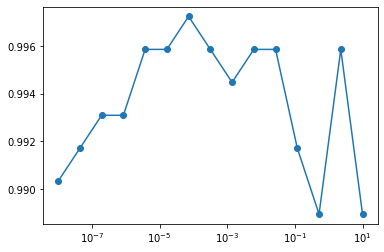

In [92]:
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-8,1,15)
scores = []
for alpha in alphas:
    m = MultinomialNB(alpha=alpha)
    m.fit(Xt, yt)
    scores.append(m.score(Xv, yv))
    
plt.plot(alphas, scores, marker="o")
plt.xscale("log")